In [1]:
import os
import glob
from skimage import data, io, filters
import matplotlib.pyplot as plt
from IPython.display import display, Image
import PIL
import time
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import cm

video_in_folder = 'videos'
video_files = glob.glob(video_in_folder+'/*.mp4')
print(video_files)

['videos/sonosite_phasedarray_07.mp4', 'videos/philips_curvedlinear_01.mp4', 'videos/sonosite_linear_04.mp4', 'videos/mindray_linear_04.mp4', 'videos/sonosite_curvedlinear_02.mp4', 'videos/sonosite_phasedarray_05.mp4', 'videos/sonosite_linear_01.mp4', 'videos/philips_curvedlinear_02.mp4', 'videos/sonosite_curvedlinear_06.mp4', 'videos/sonosite_phasedarray_03.mp4', 'videos/sonosite_linear_03.mp4', 'videos/sonosite_linear_02.mp4', 'videos/sample-covid.mp4', 'videos/sample-smooth-pulm-edema.mp4', 'videos/sonosite_phasedarray_10.mp4', 'videos/sonosite_curvedlinear_03.mp4', 'videos/sample-ncovid.mp4', 'videos/philips_linear_02.mp4', 'videos/sonosite_phasedarray_09.mp4', 'videos/sonosite_phasedarray_08.mp4', 'videos/mindray_phasedarray_01.mp4', 'videos/mindray_phasedarray_02.mp4', 'videos/sonosite_phasedarray_04.mp4', 'videos/sonosite_phasedarray_02.mp4', 'videos/mindray_curvedlinear.mp4', 'videos/philips_phasedarray_03.mp4', 'videos/sonosite_curvedlinear_05.mp4', 'videos/philips_phasedarray

In [2]:
def get_mask(video_name):

    if not os.path.exists('frames'):
        !mkdir frames
    if not os.path.exists('final'):
        !mkdir final
    if not os.path.exists('temp'):
        !mkdir temp
    if not os.path.exists('frames/'+video_name):
        !mkdir frames/$video_name
        !ffmpeg -i $video_file -f image2 "frames/$video_name/video-frame%05d.png"

    files = glob.glob('frames/'+video_name+'/*.png')

    files.sort()
    print(type(files))
    
    image_path = files[0]
    image = rgb2gray(io.imread(image_path))
    io.imsave('final/'+video_name+'_in.png',image)
    io.imsave('temp/'+video_name+'_00_in.png',image)
    plt.imshow(image,'gray')
    print(image.shape)
    print(image.max())
    
    # take the N first images and find the variance
    N = len(files)
    cube = np.zeros((image.shape[0], image.shape[1],N))
    print(cube.shape)

    image_path = files[0]
    for i in np.arange(0,N):
        image_path = files[i]
        image = rgb2gray(io.imread(image_path))
        cube[:,:,i] = image

    cube_std = np.std(cube,2)
    cube_std /= cube_std.max()

    print(cube_std.max())
    plt.imshow(cube_std,'gray')
    io.imsave('temp/'+video_name+'_01_cube_std.png',cube_std)
    
    mask = np.zeros(image.shape, dtype=bool)
    mask[cube_std>0] = True
    plt.imshow(mask,'gray')
    io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)

    mask = np.zeros(image.shape, dtype=bool)
    mask[cube_std>0.06] = True
    plt.figure()
    plt.imshow(mask,'gray')
    io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
    
    from skimage.morphology import binary_opening, binary_erosion
    mask_erod = binary_erosion(mask)
    mask_erod = binary_erosion(mask_erod)
    plt.imshow(mask_erod,'gray')
    io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)

    mask_open = binary_opening(mask_erod)
    plt.figure()
    plt.imshow(mask_open,'gray')
    io.imsave('temp/'+video_name+'_04_opening.png',mask_open)
    
    from skimage.measure import label, regionprops

    labels = label(mask_open)

    props = regionprops(labels)
    props.sort(key=lambda x: x.area)

    coords = props[-1].coords.T

    largest_area = np.zeros(image.shape,dtype=bool)
    largest_area[tuple(coords)] = True
    plt.imshow(largest_area,'gray')
    io.imsave('temp/'+video_name+'_05_largest.png',largest_area)
    
    from skimage.morphology import convex_hull_image

    final_mask = convex_hull_image(largest_area)
    plt.imshow(final_mask,'gray')
    io.imsave('temp/'+video_name+'_06_final_mask.png',final_mask)
    
    return final_mask

sonosite_phasedarray_07
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(480, 640)
0.9983333333333333
(480, 640, 360)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_07_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_07_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_07_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_07_04_opening.png is a boolean image: setting True to 255 and False to 0. 

philips_curvedlinear_01
<class 'list'>
(600, 800)
1.0
(600, 800, 182)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_curvedlinear_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_curvedlinear_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_curvedlinear_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_curvedlinear_01_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_linear_04
<class 'list'>
(480, 640)
0.9893890196078432
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0
mindray_linear_04
<class 'list'>


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_linear_04_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_linear_04_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_linear_04_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_linear_04_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warn

(540, 720)
1.0
(540, 720, 70)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_linear_04_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_linear_04_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_linear_04_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_linear_04_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

sonosite_curvedlinear_02
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_02_04_opening.png is a boolean image: setting True to 255 and False to

sonosite_phasedarray_05
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.9770509803921569
(910, 1260, 51)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_05_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_05_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_05_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_05_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_linear_01
<class 'list'>
(480, 640)
0.9975
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_linear_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_linear_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_linear_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarni

1.0
philips_curvedlinear_02
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(600, 800)
1.0
(600, 800, 182)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_curvedlinear_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_curvedlinear_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_curvedlinear_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_curvedlinear_02_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_curvedlinear_06
<class 'list'>
(480, 640)
1.0
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_06_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_06_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_06_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_06_04_opening.png is a boolean image: setting True to 255 and False to

sonosite_phasedarray_03
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.9975
(910, 1260, 38)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_03_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_03_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_03_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.

sonosite_linear_03
<class 'list'>
(480, 640)
0.9975
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_linear_03_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_linear_03_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_linear_03_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_linear_03_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warn

sonosite_linear_02
<class 'list'>
(480, 640)
0.9991666666666668
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_linear_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_linear_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_linear_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarni

1.0
sample-covid
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(720, 960)
1.0
(720, 960, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sample-covid_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sample-covid_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sample-covid_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sample-covid_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the 

sample-smooth-pulm-edema
<class 'list'>
(480, 640)
1.0
(480, 640, 240)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sample-smooth-pulm-edema_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sample-smooth-pulm-edema_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sample-smooth-pulm-edema_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sample-smooth-pulm-edema_04_opening.png is a boolean image: setting True to 255 and False to

sonosite_phasedarray_10
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_10_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_10_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_10_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_10_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_curvedlinear_03
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_03_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_03_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_03_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_03_04_opening.png is a boolean image: setting True to 255 and False to

sample-ncovid
<class 'list'>
(720, 960)
1.0
(720, 960, 120)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sample-ncovid_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sample-ncovid_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sample-ncovid_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sample-ncovid_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert 

philips_linear_02
<class 'list'>
(600, 800)
1.0
(600, 800, 47)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_linear_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_linear_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_linear_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_linear_02_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

sonosite_phasedarray_09
<class 'list'>
(480, 640)
1.0
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_09_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_09_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_09_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_09_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_phasedarray_08
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 360)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_08_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_08_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_08_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_08_04_opening.png is a boolean image: setting True to 255 and False to 0. 

mindray_phasedarray_01
<class 'list'>
(540, 720)
1.0
(540, 720, 165)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_phasedarray_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_phasedarray_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_phasedarray_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_phasedarray_01_04_opening.png is a boolean image: setting True to 255 and False to 0. To s

mindray_phasedarray_02
<class 'list'>
(540, 720)
1.0
(540, 720, 152)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_phasedarray_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_phasedarray_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_phasedarray_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_phasedarray_02_04_opening.png is a boolean image: setting True to 255 and False to 0. To s

sonosite_phasedarray_04
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.9975
(910, 1260, 87)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_04_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_04_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_04_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_04_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_phasedarray_02
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.9966666666666666
(910, 1260, 87)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_02_04_opening.png is a boolean image: setting True to 255 and False to 0. 

mindray_curvedlinear
<class 'list'>
(540, 720)
1.0
(540, 720, 73)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_curvedlinear_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_curvedlinear_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_curvedlinear_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_curvedlinear_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence t

philips_phasedarray_03
<class 'list'>
(600, 800)
1.0
(600, 800, 101)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_phasedarray_03_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_phasedarray_03_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_phasedarray_03_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_phasedarray_03_04_opening.png is a boolean image: setting True to 255 and False to 0. To s

sonosite_curvedlinear_05
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_05_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_05_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_05_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_05_04_opening.png is a boolean image: setting True to 255 and False to

philips_phasedarray_01
<class 'list'>
(600, 800)
1.0
(600, 800, 101)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_phasedarray_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_phasedarray_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_phasedarray_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_phasedarray_01_04_opening.png is a boolean image: setting True to 255 and False to 0. To s

sonosite_phasedarray_01
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.98605568627451
(910, 1260, 61)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_01_04_opening.png is a boolean image: setting True to 255 and False to 0. 

sonosite_phasedarray_06
<class 'list'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(910, 1260)
0.9941666666666666
(910, 1260, 93)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_phasedarray_06_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_phasedarray_06_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_phasedarray_06_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_phasedarray_06_04_opening.png is a boolean image: setting True to 255 and False to 0. 

other_01
<class 'list'>
(480, 640)
0.9568627450980391
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/other_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/other_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/other_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/other_01_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_

sonosite_curvedlinear_04
<class 'list'>
(480, 640)
0.9966666666666666
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_04_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_04_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_04_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_04_04_opening.png is a boolean image: setting True to 255 and False to

sonosite_curvedlinear_01
<class 'list'>
(480, 640)
0.9983333333333333
(480, 640, 180)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/sonosite_curvedlinear_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/sonosite_curvedlinear_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/sonosite_curvedlinear_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/sonosite_curvedlinear_01_04_opening.png is a boolean image: setting True to 255 and False to

mindray_linear_01
<class 'list'>
(540, 720)
1.0
(540, 720, 148)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_linear_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_linear_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_linear_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_linear_01_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

philips_phasedarray_02
<class 'list'>
(600, 800)
1.0
(600, 800, 101)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_phasedarray_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_phasedarray_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_phasedarray_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_phasedarray_02_04_opening.png is a boolean image: setting True to 255 and False to 0. To s

philips_linear_01
<class 'list'>
(600, 800)
1.0
(600, 800, 330)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/philips_linear_01_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/philips_linear_01_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/philips_linear_01_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/philips_linear_01_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

mindray_linear_02
<class 'list'>
(540, 720)
1.0
(540, 720, 117)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_linear_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_linear_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_linear_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_linear_02_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

mindray_linear_03
<class 'list'>
(540, 720)
1.0
(540, 720, 71)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/mindray_linear_03_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/mindray_linear_03_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/mindray_linear_03_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/mindray_linear_03_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning,

other_02
<class 'list'>
(600, 800)
1.0
(600, 800, 87)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0


<ipython-input-2-bcb167e7ff38>:47: UserWarning: temp/other_02_02_mask_no_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_no_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:53: UserWarning: temp/other_02_02_mask_threshold.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_02_mask_threshold.png',mask)
<ipython-input-2-bcb167e7ff38>:59: UserWarning: temp/other_02_03_erod.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('temp/'+video_name+'_03_erod.png',mask_erod)
<ipython-input-2-bcb167e7ff38>:64: UserWarning: temp/other_02_04_opening.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_

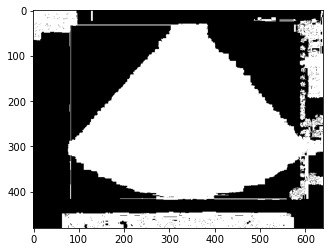

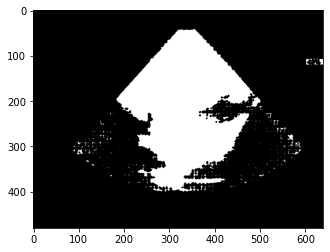

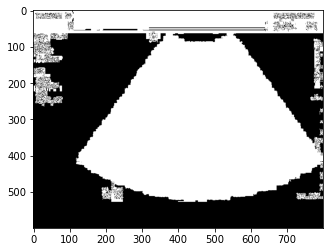

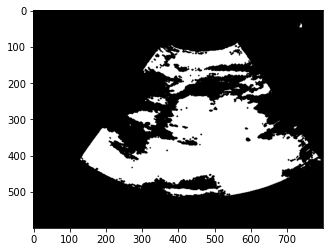

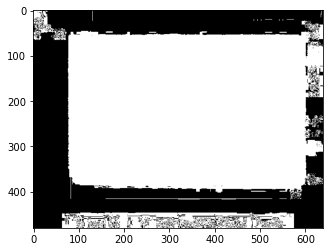

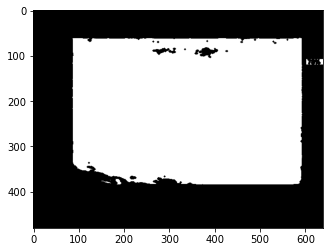

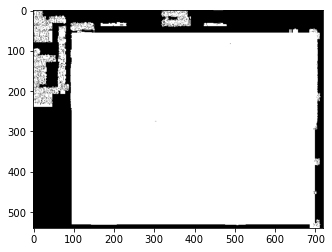

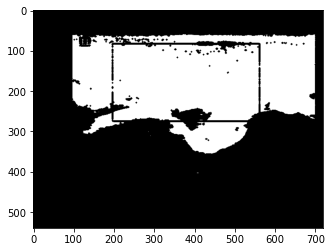

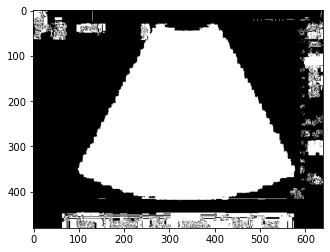

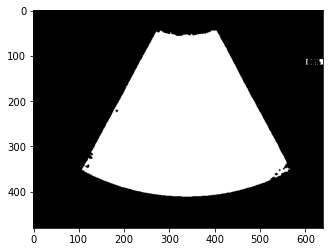

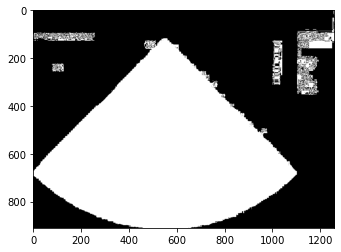

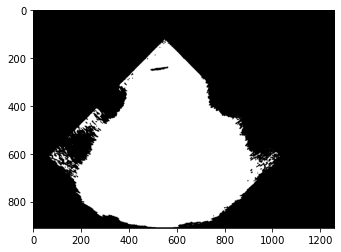

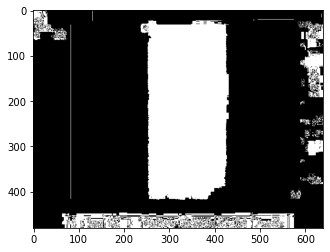

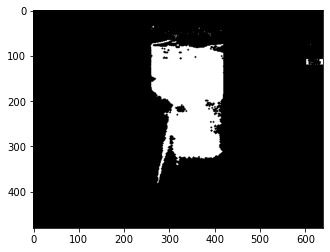

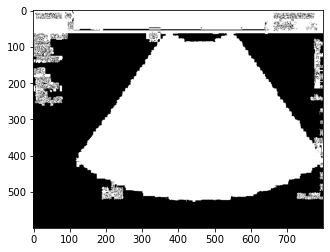

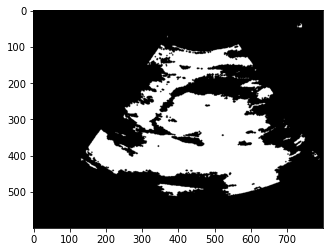

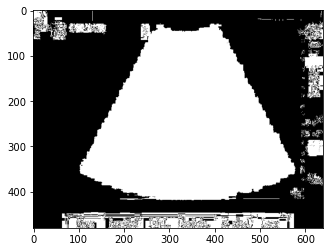

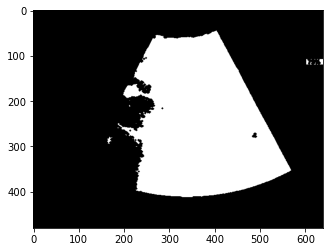

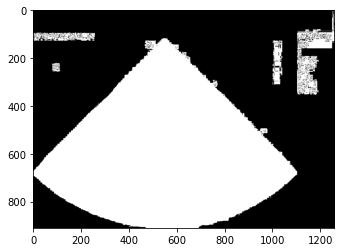

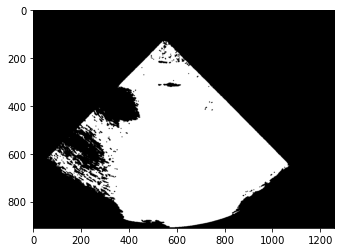

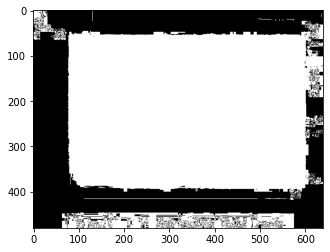

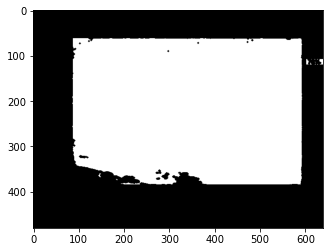

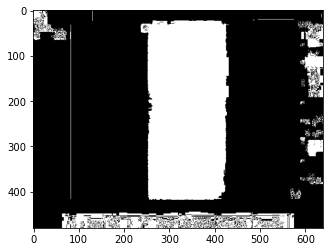

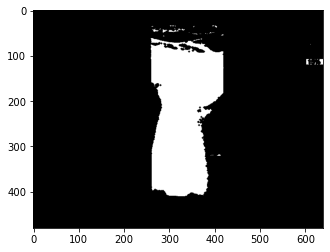

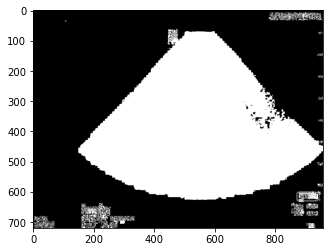

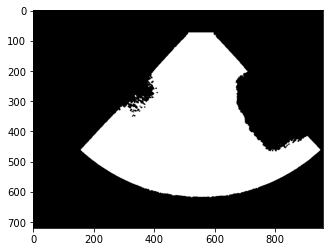

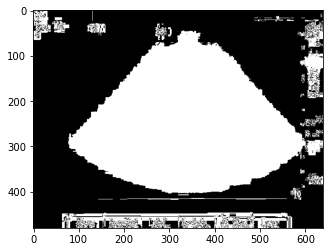

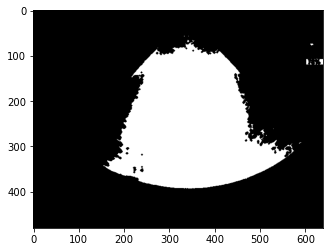

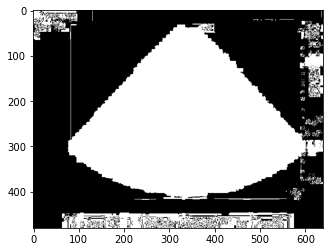

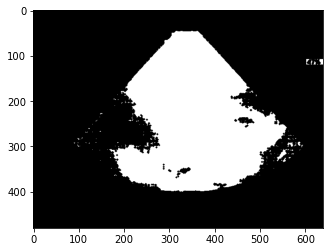

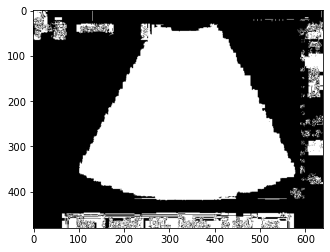

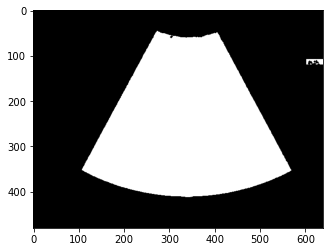

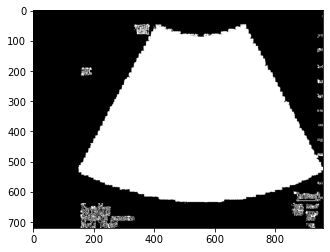

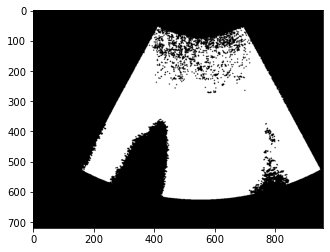

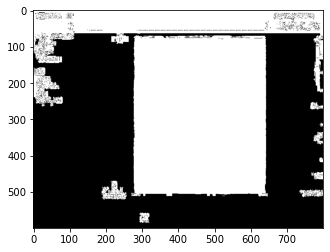

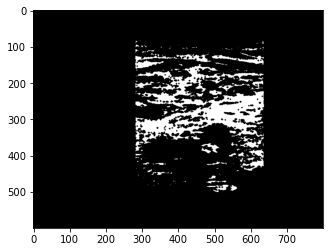

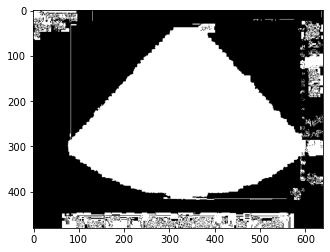

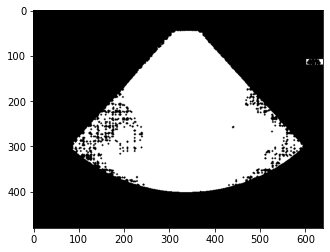

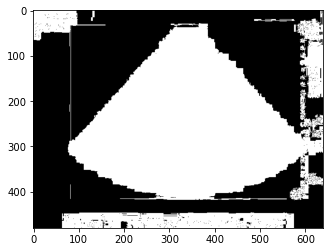

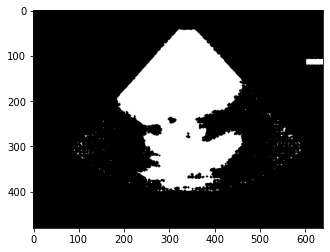

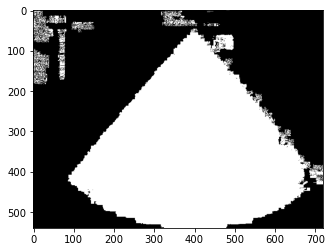

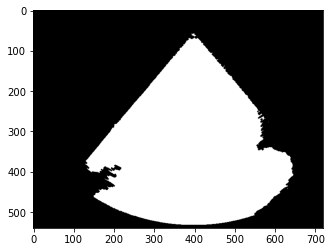

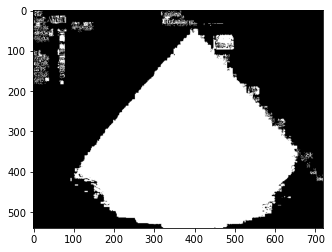

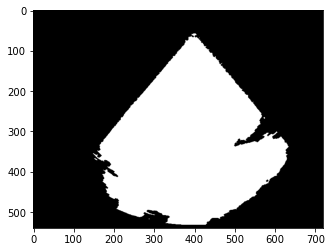

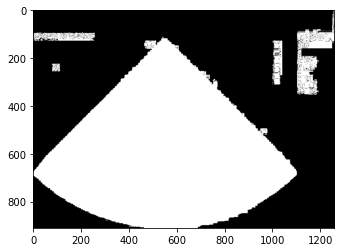

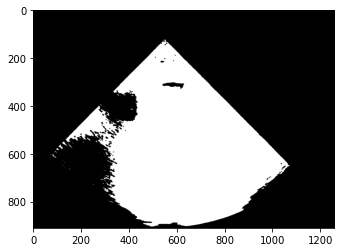

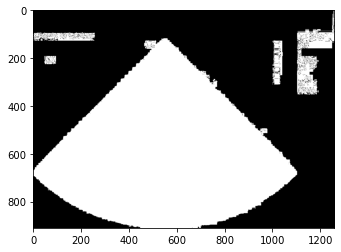

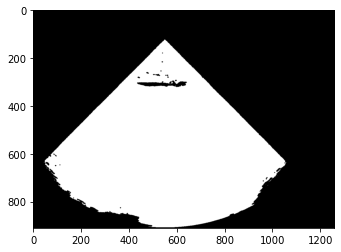

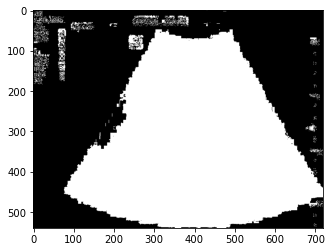

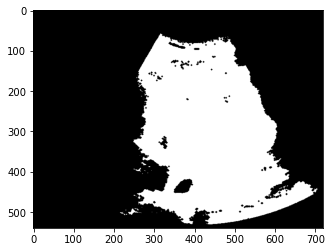

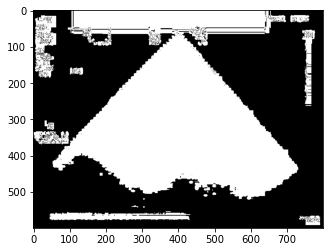

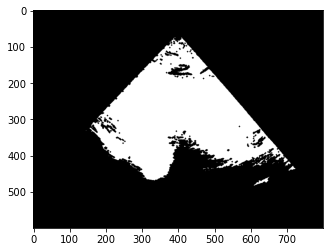

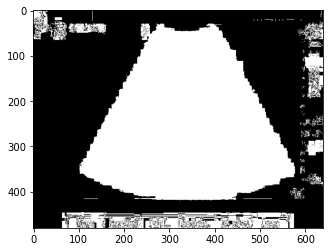

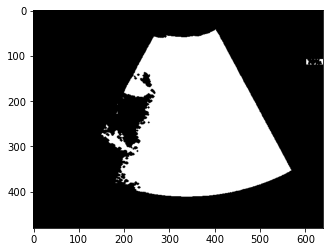

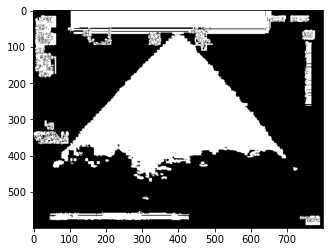

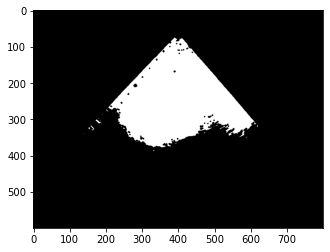

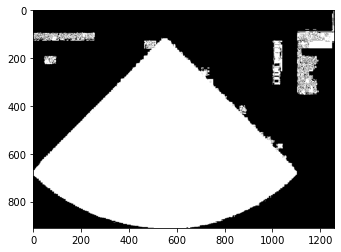

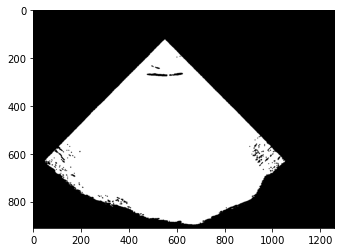

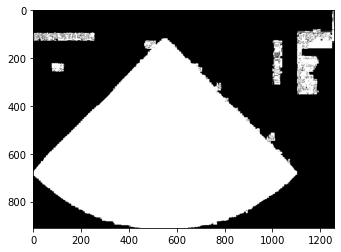

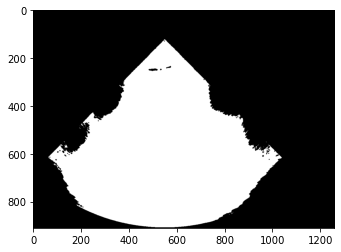

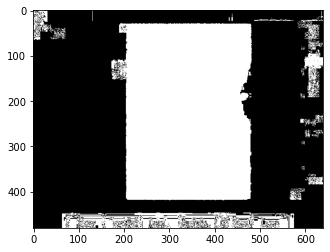

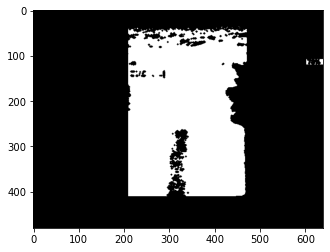

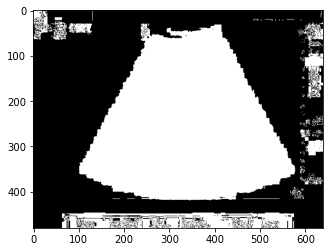

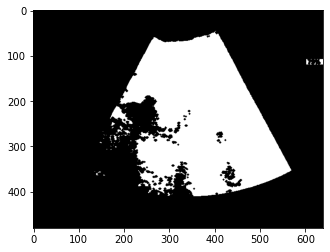

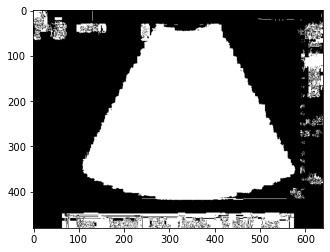

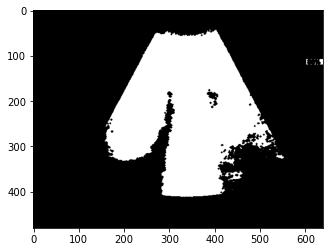

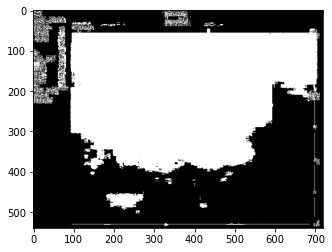

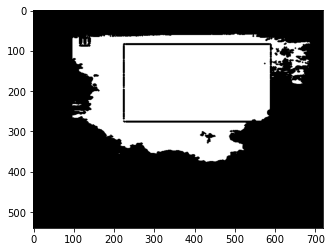

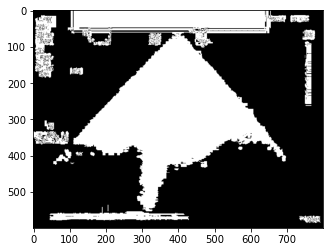

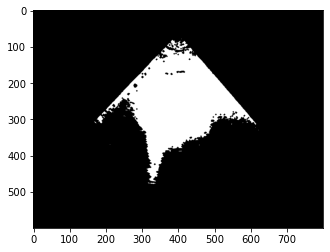

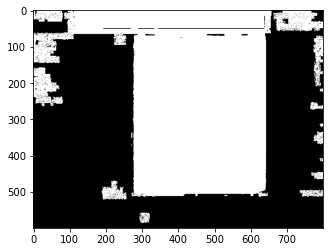

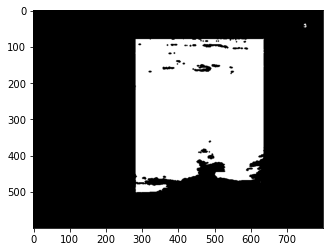

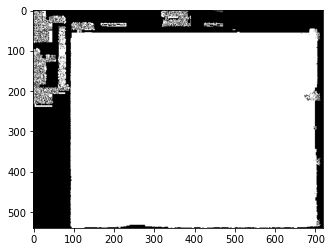

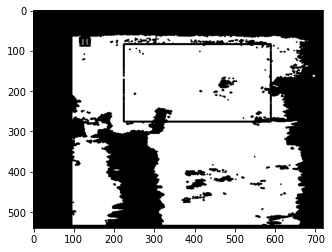

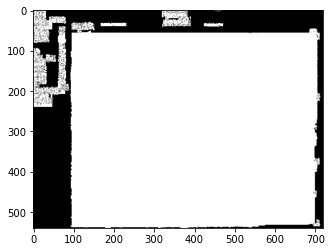

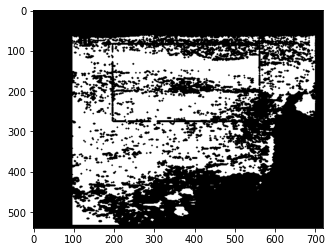

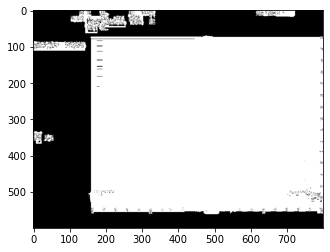

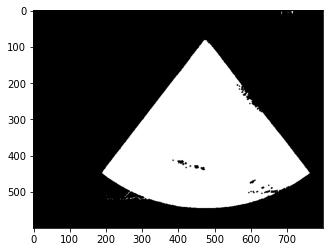

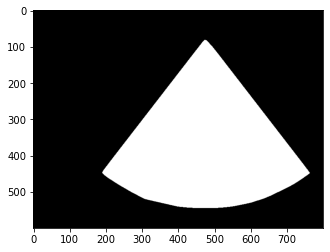

In [3]:

for video_file in video_files:
    folder, file = os.path.split(video_file)
    video_name = os.path.splitext(file)[0]
    print(video_name)

    image = get_mask(video_name)
    io.imsave('final/'+video_name+'_out.png',image)